<a href="https://colab.research.google.com/github/gabrielvime/statistics_ML/blob/main/estatistica_e_LLMs/ATIVIDADE1_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTAR O DATASET

In [1]:
#IMPORTS

from google.colab import drive
import pandas as pd
import os
#import shutil
import cv2
#import numpy as np
import matplotlib.pyplot as plt
#import random

In [2]:
#montar drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#descompactar dataset
!unzip -q '/content/drive/MyDrive/dataset/Anti-UAV-RGBT.zip' -d '/content/dataset'

In [34]:
#variavei de PATH

train_path = '/content/dataset/train/'
test_path = '/content/dataset/test/'


In [35]:
#verificar se esta tudo certo
os.listdir('/content/dataset')
os.listdir(train_path+'/20190925_130434_1_3')

['infrared.json', 'visible.mp4', 'visible.json', 'infrared.mp4']

#Parte 1



## A) Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados. Não esqueça do contexto sobre o dataset usado, com a explicação sobre ele, suas classes e features.

\

DATASET:
\
O dataset escolhido foi o Anti-UAV (disponível em https://arxiv.org/abs/2101.08466), se trata de um dataset para detecção de drones com mais de 300 pares de videos (RGB e infravermelho) e 580 mil caixas delimitadoras cujo objetivo é facilitar pesquisas sobre o rastreamento de drones. Os videos foram gravados em duas condições de luz (dia e noite), dois modos de luz (RGB e infravermelho) e diversos fundos. Cada video é armazenado no formato MP4 a 25 FPS e é anotado a cada 25 frames. Os valores médios dos tamanhos de cada objetivo (drone) são todos menores que 40 pixels. Quando o graund-truth entre dois frames adjacentes é maior que 60 pixels, significa que o drone está se movimentando rapidamente, dificultando a classificação.
\
\
 Para a realizaçao da tarefa, foram escolhidos 5 frames definidos (25, 250, 500, 1000 e 1250) para serem analisados, essa escolha partiu da ocorrência da notação a cada 25 frames. O número de bins escolhidos foram 40 e 60, por conta das propriedades do tamanho médio dos objetivos (40) e da velocidade de movimentação considerada rápida de mais (60). Foram feitos histogramas tanto para dia quanto para noite.

###HISTOGRAMAS COM 40 BINS


Escolhe 5 frames para fazer o histograma.
Video aleatorio do set de treino em luz visivel (RGB)

In [59]:
#quantidade de bins
bins40 = 40

In [37]:
#escolhe os frames
chosen_frames = [25, 250, 500, 1000, 1250]

####PAR RGB, DIA

In [57]:
#escolhe um video do set de treino (RGB, DIA)
data_rgb_d = cv2.VideoCapture(train_path+'/20190925_130434_1_3/visible.mp4')

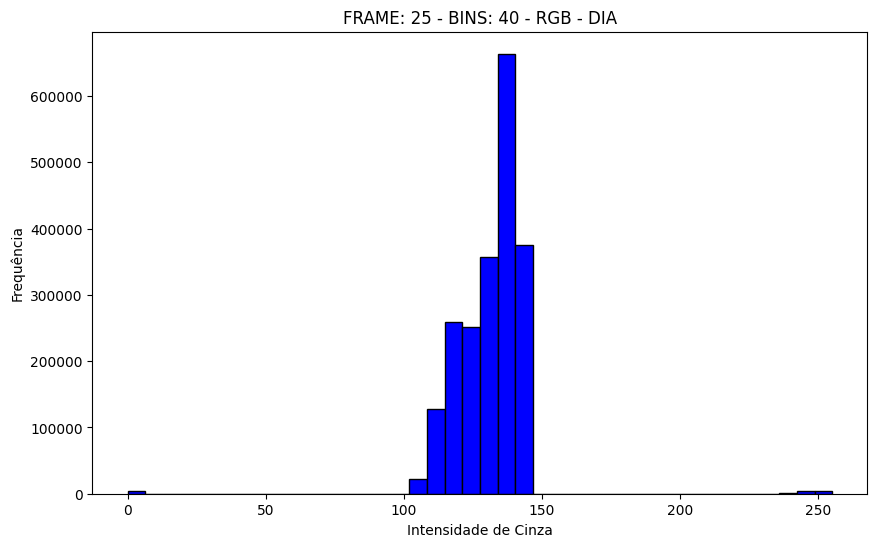

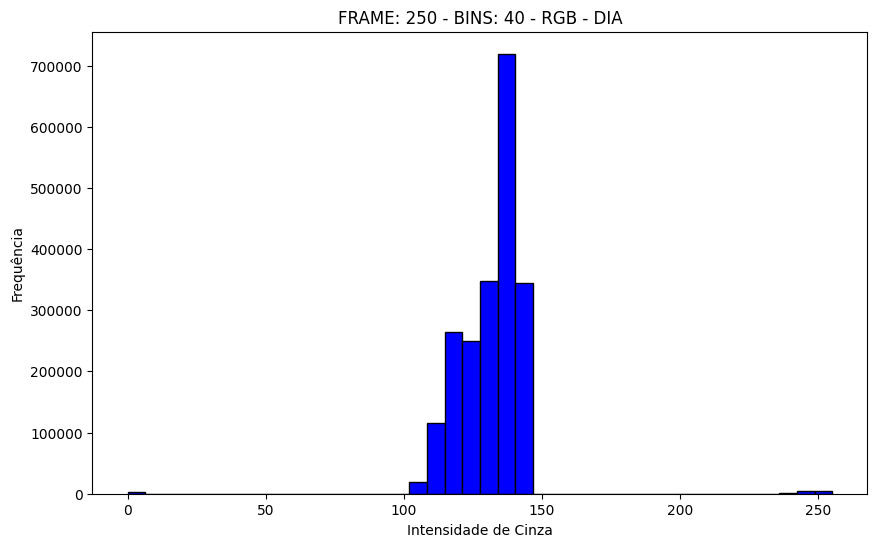

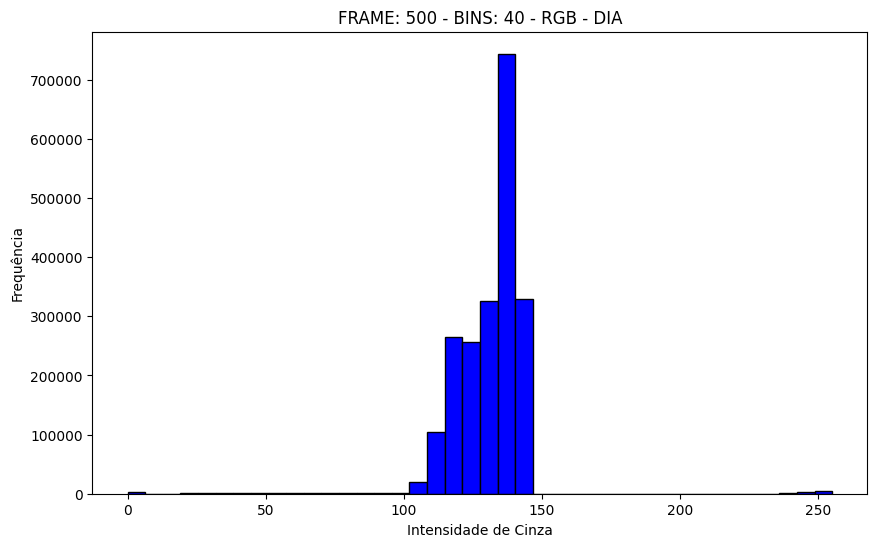

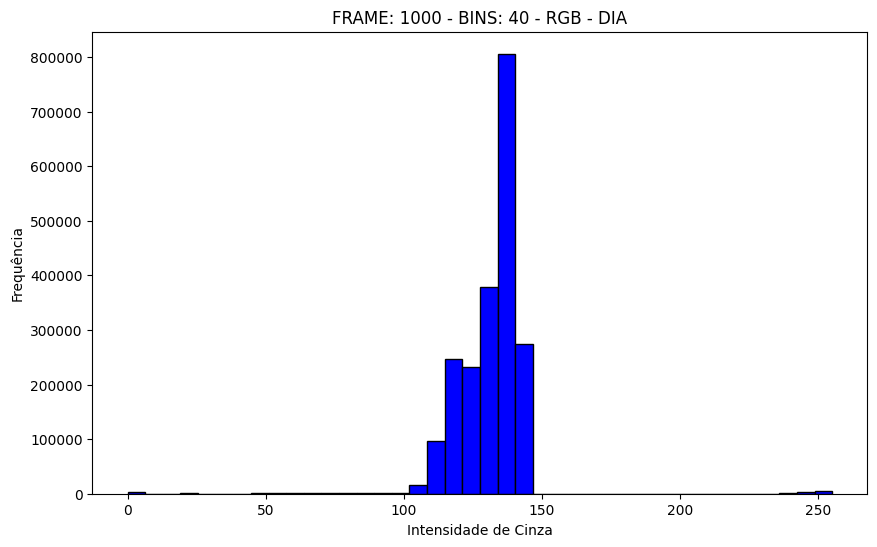

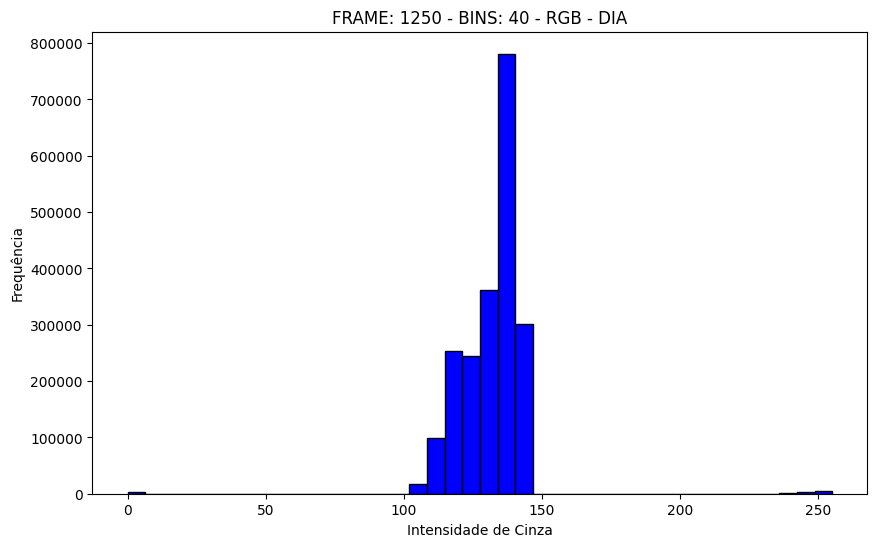

In [60]:
#plota o histograma
for chosen_frame in chosen_frames:
  data_rgb_d.set(cv2.CAP_PROP_POS_MSEC, chosen_frame)

  ret, frame_rgb = data_rgb_d.read()

  if ret:
    #converte para escala de cinza
    gray = cv2.cvtColor(frame_rgb, cv2.COLOR_BGR2GRAY)

    #gera o histograma
    plt.figure(figsize=(10, 6))
    plt.hist(gray.ravel(), bins=bins40, color='blue', edgecolor='black')

    plt.title('FRAME: '+ str(chosen_frame) + ' - BINS: ' + str(bins40) +' - RGB - DIA')
    plt.xlabel('Intensidade de Cinza')
    plt.ylabel('Frequência')

    plt.show()




####PAR INFRAVERMELHO DIA
Faz o mesmo porem para o par infravermelho

In [79]:
#escolhe o par infravermelho
data_ir_d = cv2.VideoCapture(train_path+'/20190925_130434_1_3/infrared.mp4')

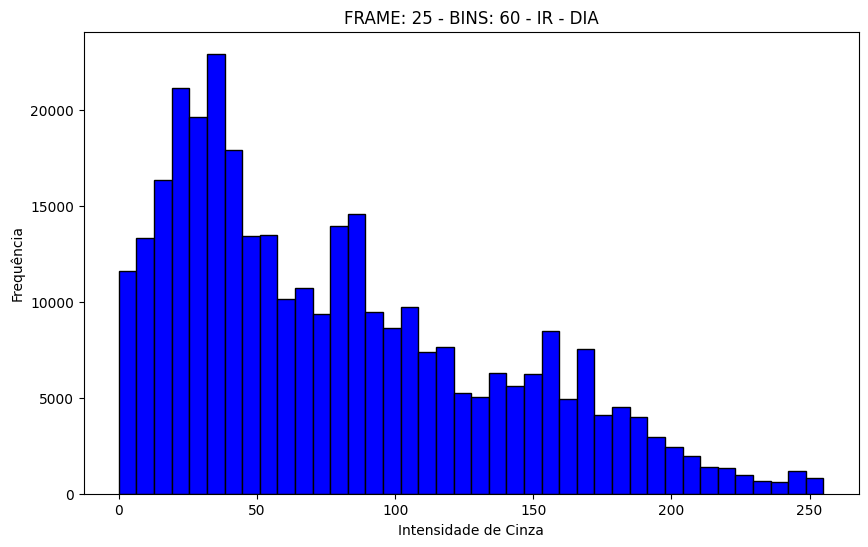

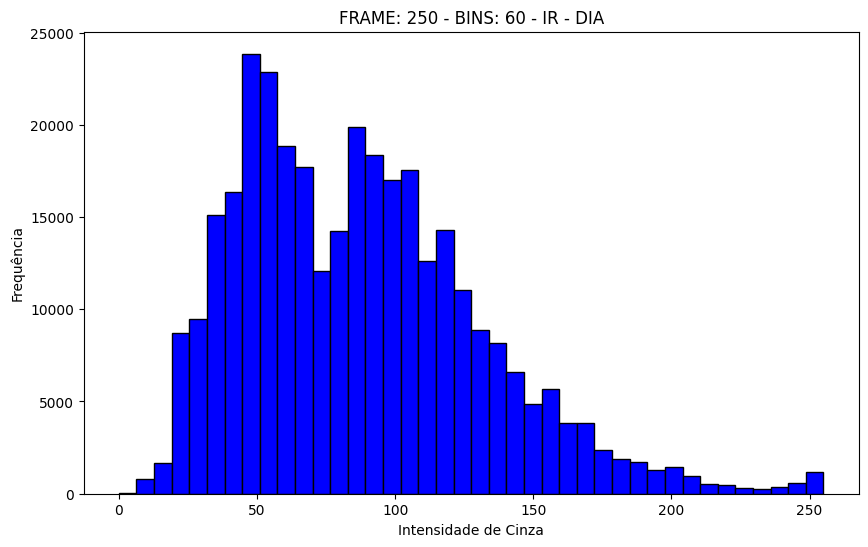

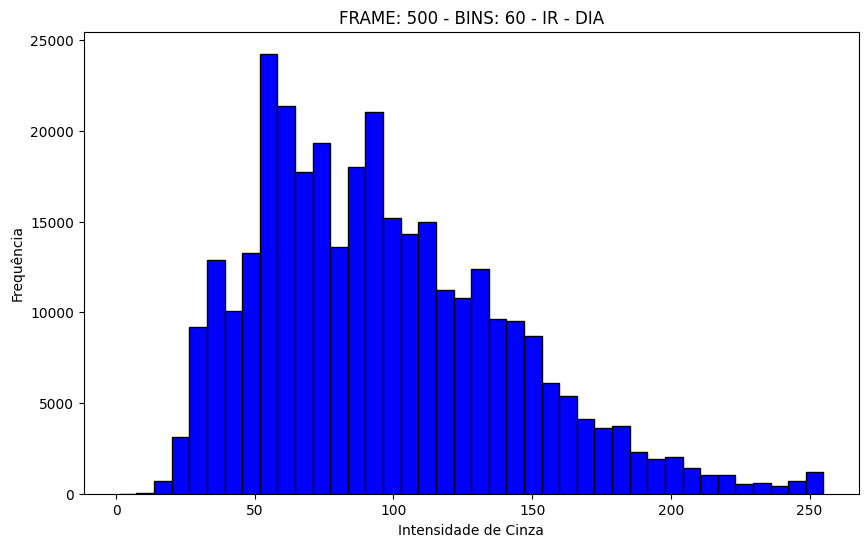

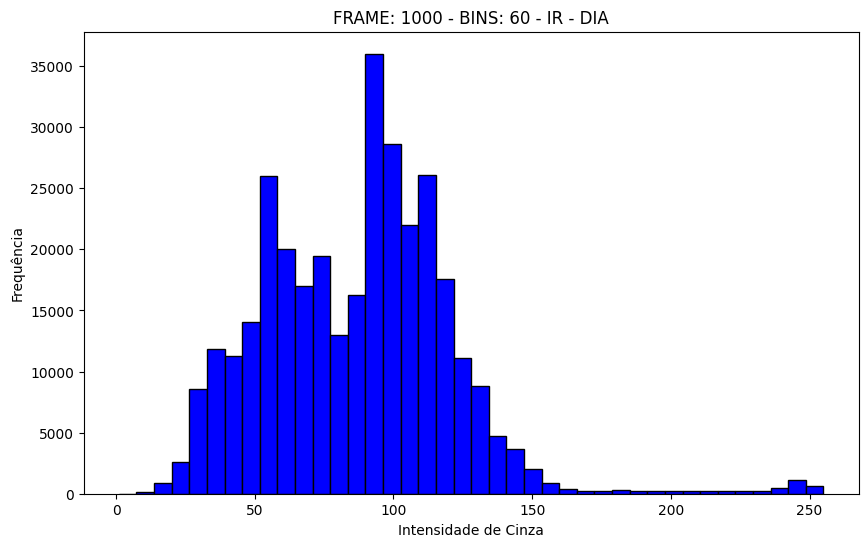

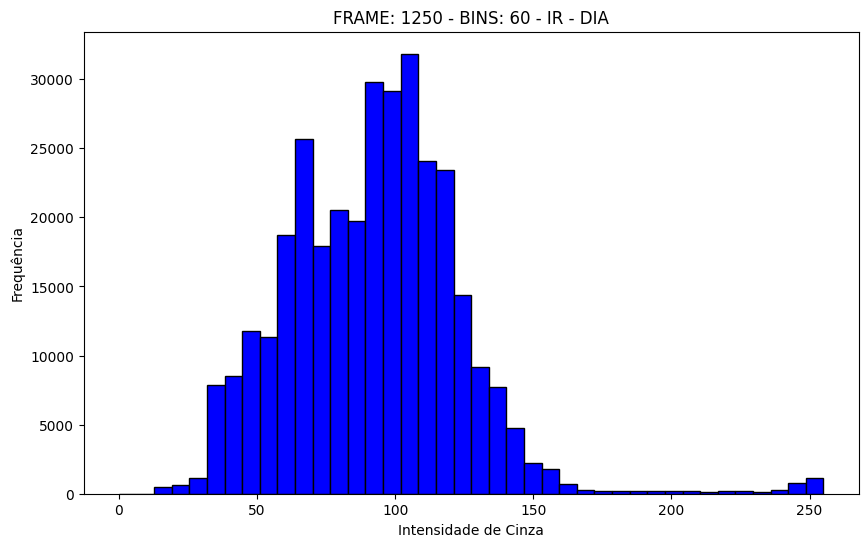

In [80]:
for chosen_frame in chosen_frames:
  data_ir_d.set(cv2.CAP_PROP_POS_MSEC, chosen_frame)

  ret, frame_t = data_ir_d.read()

  if ret:
    #converte para escala de cinza
    gray = cv2.cvtColor(frame_t, cv2.COLOR_BGR2GRAY)

    #gera o histograma
    plt.figure(figsize=(10, 6))
    plt.hist(gray.ravel(), bins=bins40, color='blue', edgecolor='black')

    plt.title('FRAME: '+ str(chosen_frame) + ' - BINS: ' + str(bins2) +' - IR - DIA')
    plt.xlabel('Intensidade de Cinza')
    plt.ylabel('Frequência')

    plt.show()

####PAR RGB NOITE

In [74]:
#video RGB NOITE
data_rgb_n = cv2.VideoCapture(train_path+'/20190925_210802_1_2/visible.mp4')

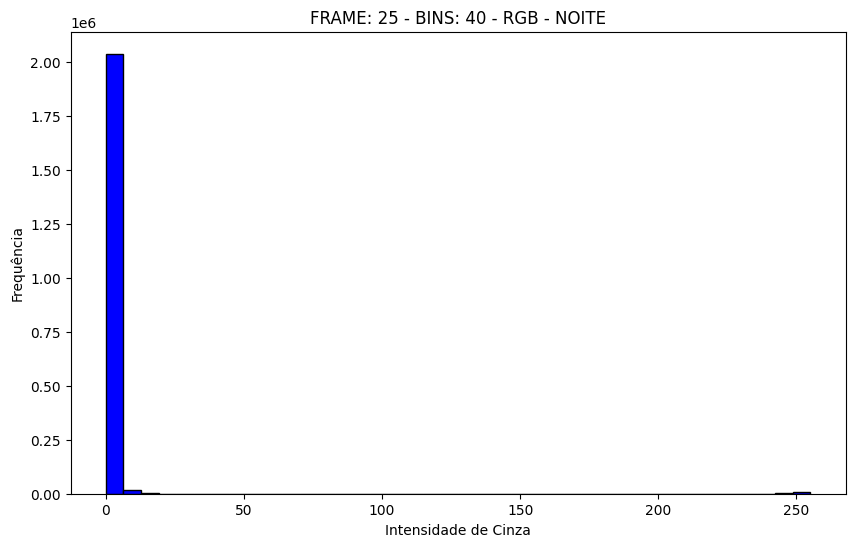

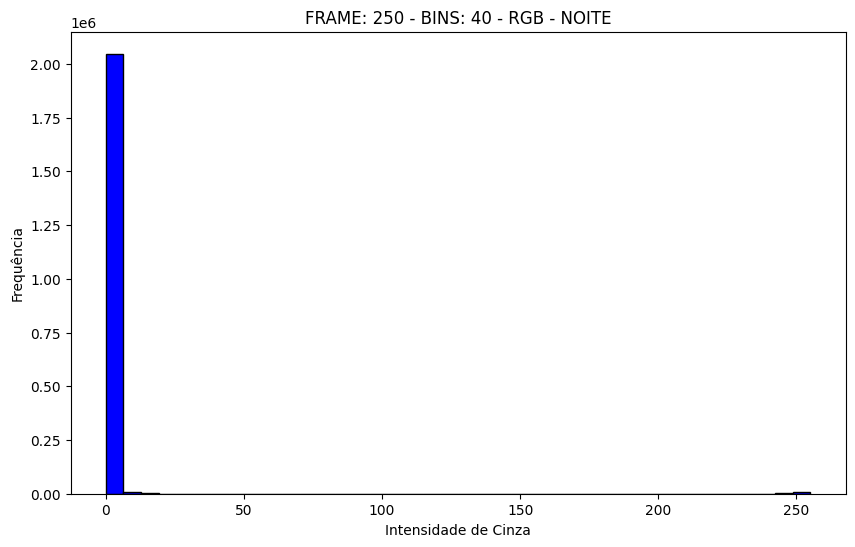

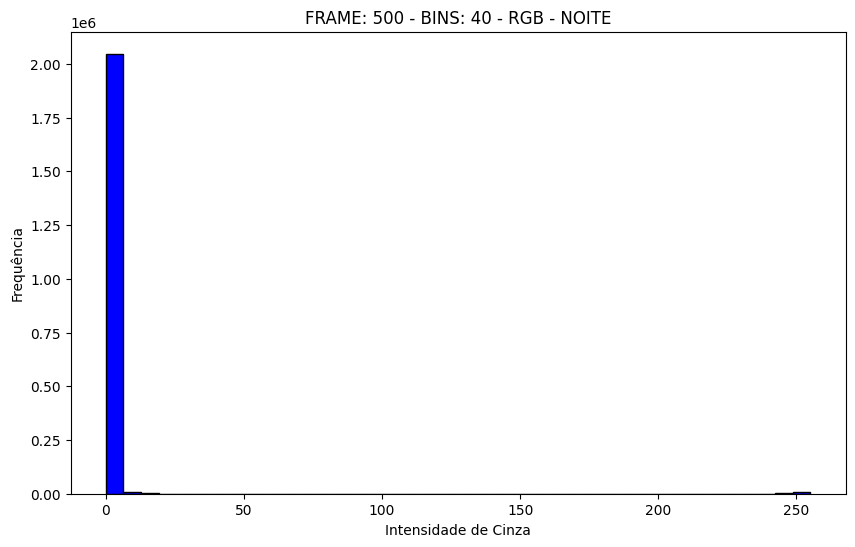

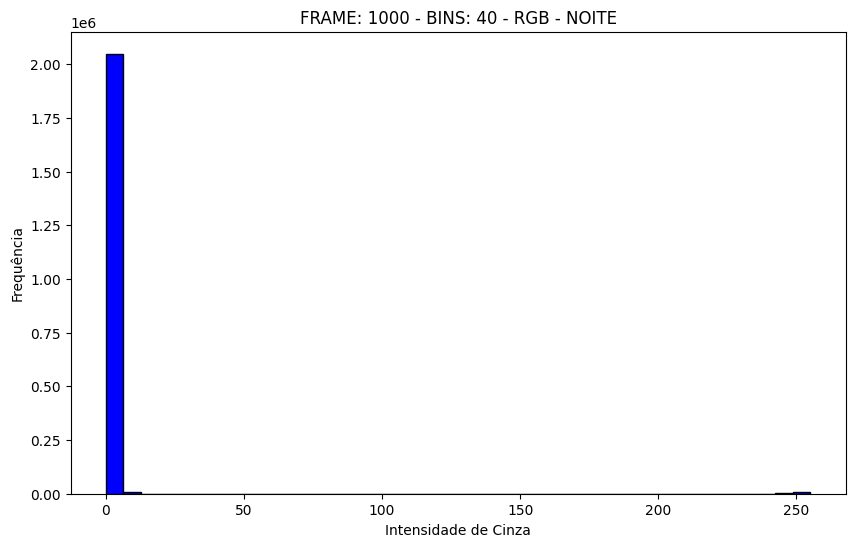

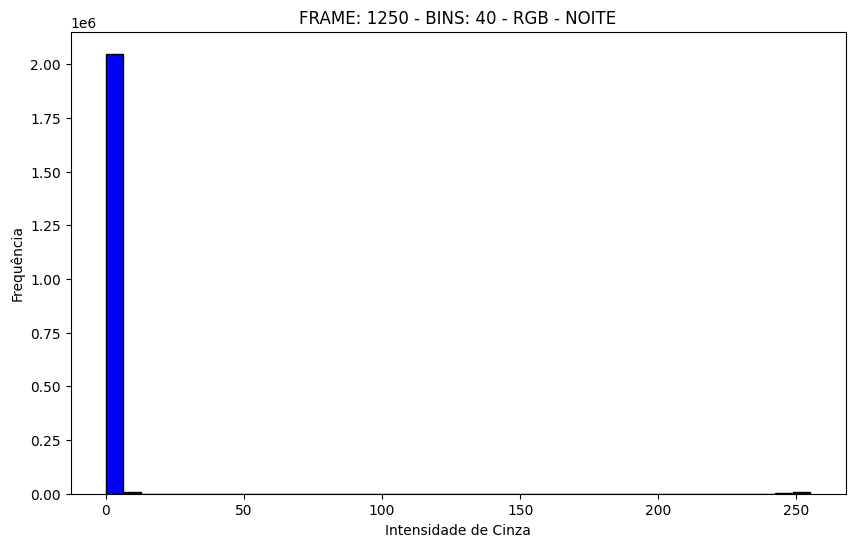

In [75]:
for chosen_frame in chosen_frames:
  data_rgb_n.set(cv2.CAP_PROP_POS_MSEC, chosen_frame)

  ret, frame_rgb = data_rgb_n.read()

  if ret:
    #converte para escala de cinza
    gray = cv2.cvtColor(frame_rgb, cv2.COLOR_BGR2GRAY)

    #gera o histograma
    plt.figure(figsize=(10, 6))
    plt.hist(gray.ravel(), bins=bins40, color='blue', edgecolor='black')

    plt.title('FRAME: '+ str(chosen_frame) + ' - BINS: ' + str(bins40) +' - RGB - NOITE')
    plt.xlabel('Intensidade de Cinza')
    plt.ylabel('Frequência')

    plt.show()

####PAR INFRAVERMELHO NOITE

In [81]:
#video IR NOITE
data_ir_n = cv2.VideoCapture(train_path+'/20190925_210802_1_2/infrared.mp4')

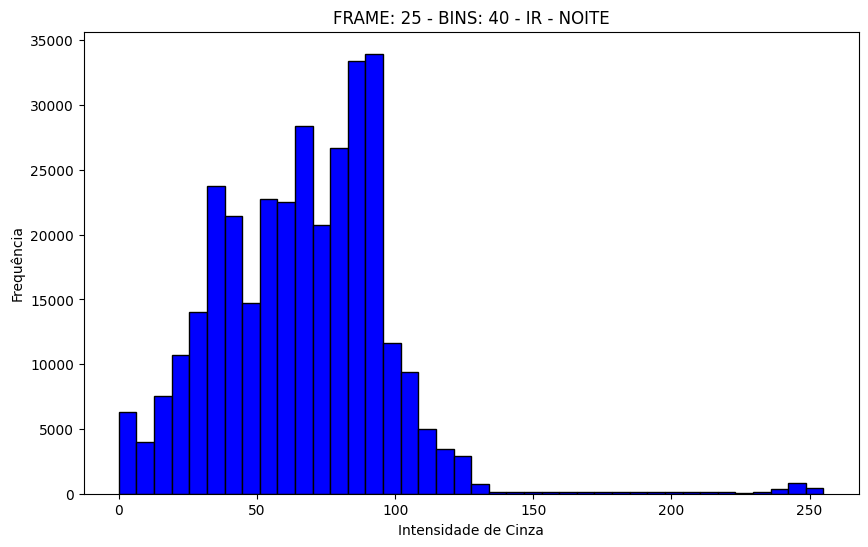

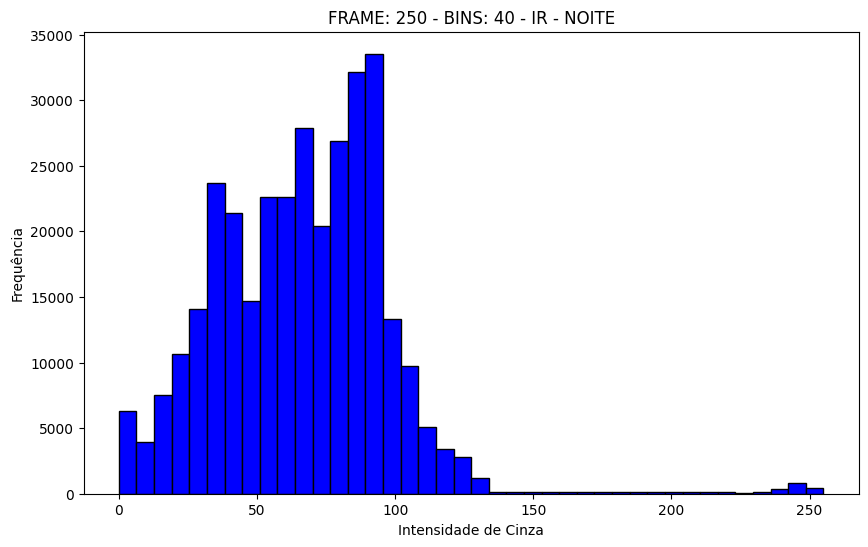

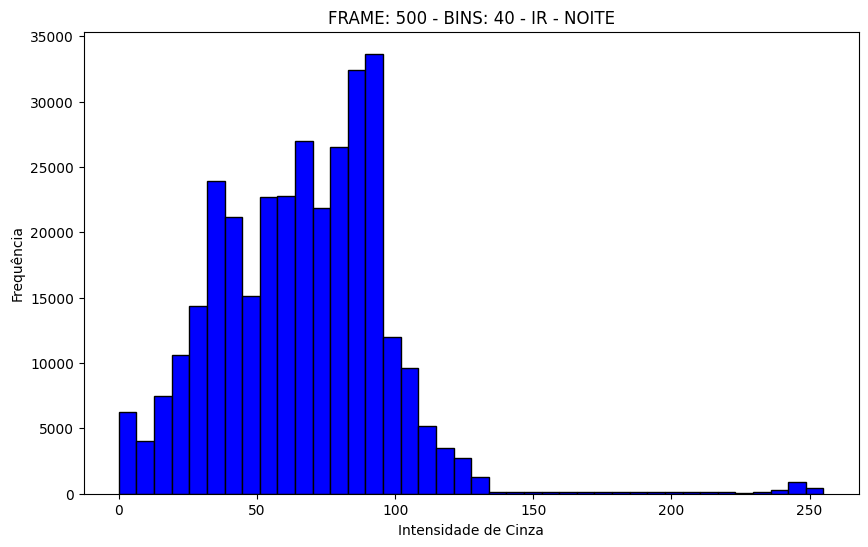

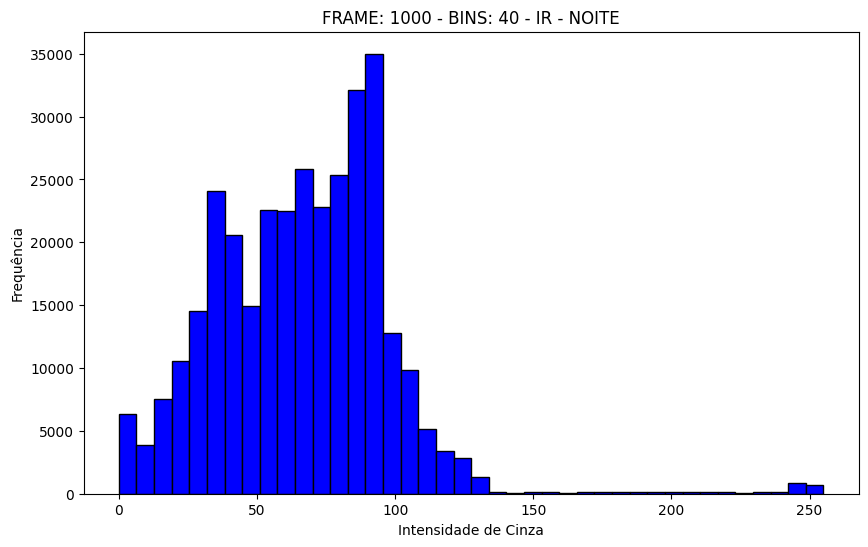

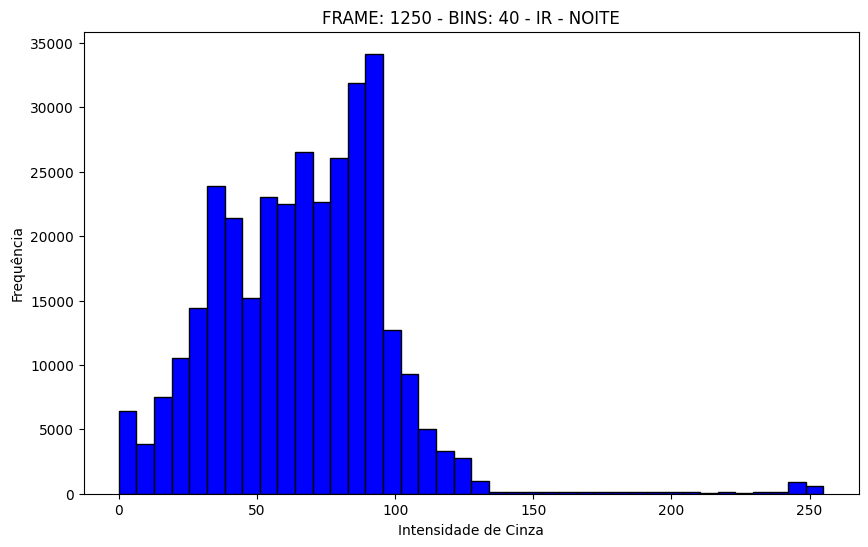

In [82]:
for chosen_frame in chosen_frames:
  data_ir_n.set(cv2.CAP_PROP_POS_MSEC, chosen_frame)

  ret, frame_rgb = data_ir_n.read()

  if ret:
    #converte para escala de cinza
    gray = cv2.cvtColor(frame_rgb, cv2.COLOR_BGR2GRAY)

    #gera o histograma
    plt.figure(figsize=(10, 6))
    plt.hist(gray.ravel(), bins=bins40, color='blue', edgecolor='black')

    plt.title('FRAME: '+ str(chosen_frame) + ' - BINS: ' + str(bins40) +' - IR - NOITE')
    plt.xlabel('Intensidade de Cinza')
    plt.ylabel('Frequência')

    plt.show()

###HISTOGRAMAS COM 60 BINS

In [65]:
bins60 = 60

####PAR RGB DIA

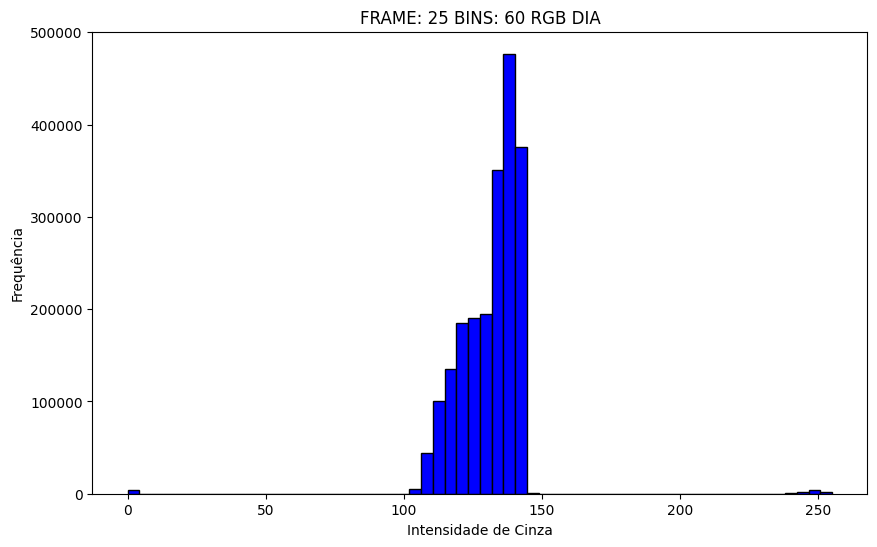

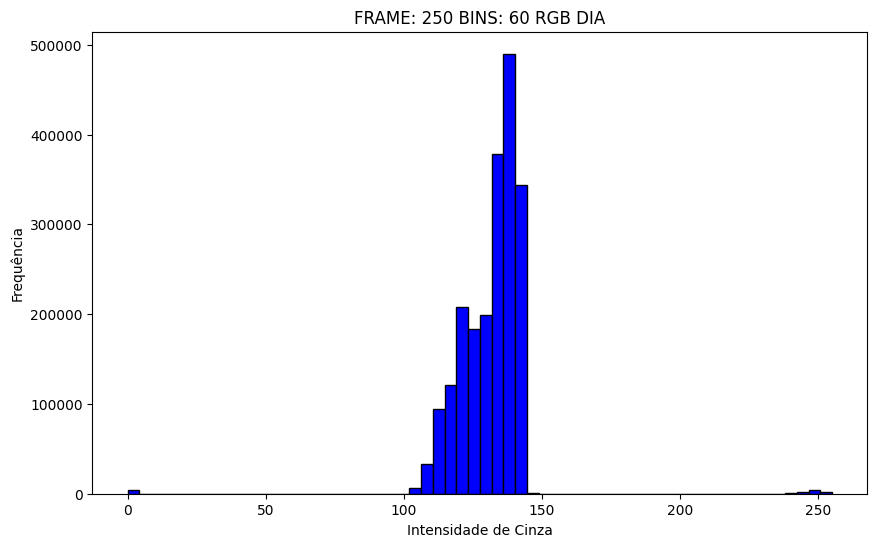

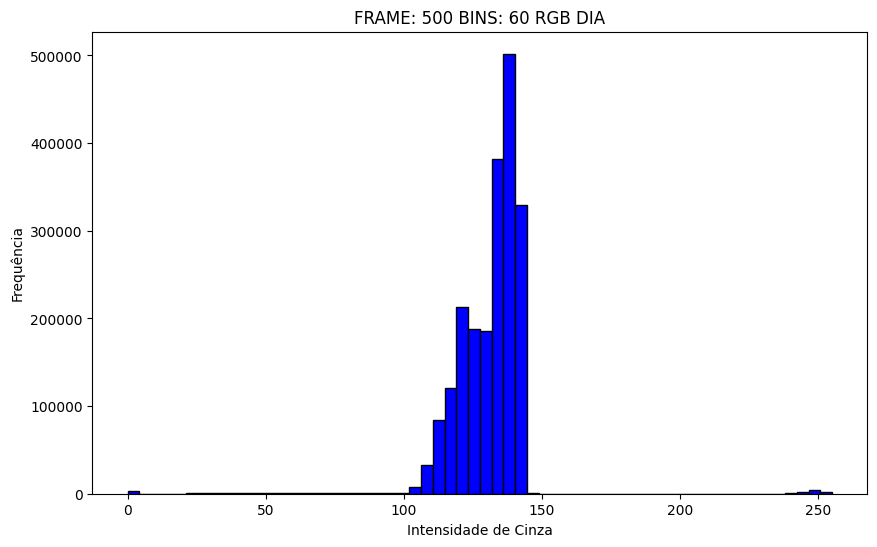

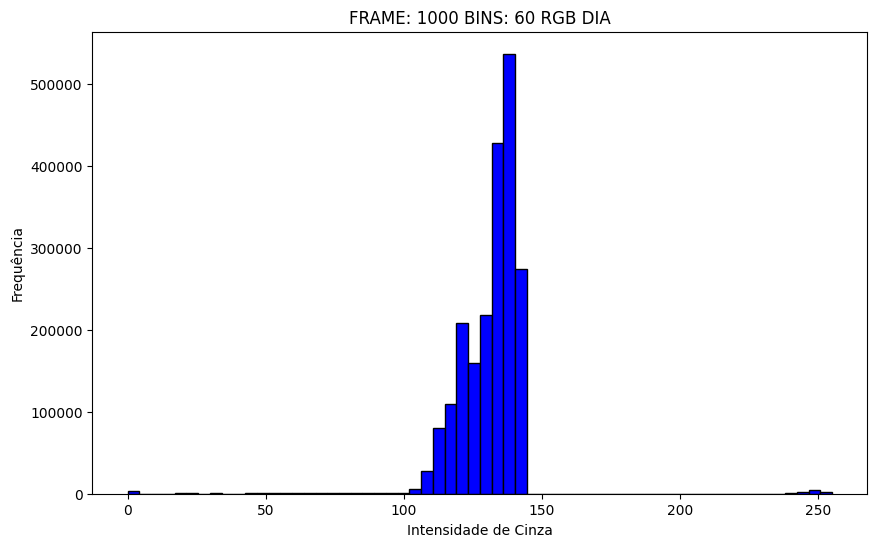

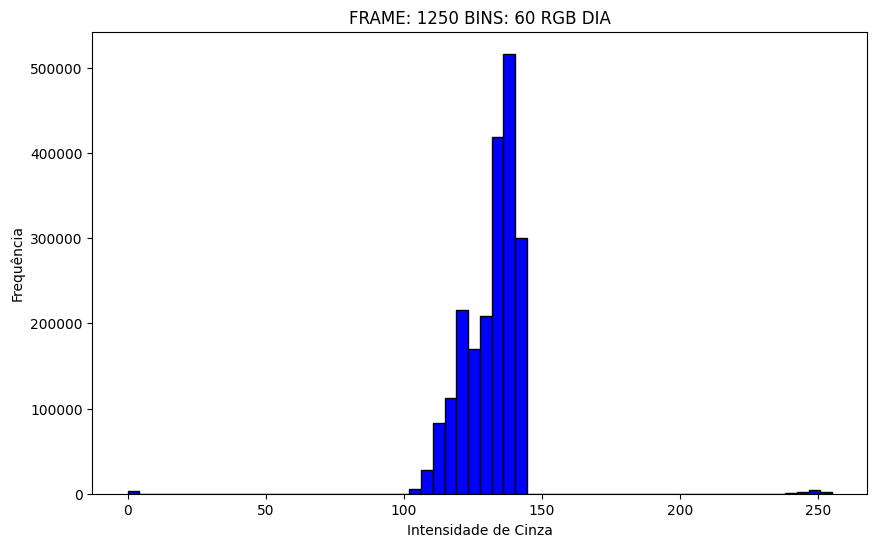

In [66]:
for chosen_frame in chosen_frames:
  data_rgb_d.set(cv2.CAP_PROP_POS_MSEC, chosen_frame)

  ret, frame_rgb = data_rgb_d.read()

  if ret:
    #converte para escala de cinza
    gray = cv2.cvtColor(frame_rgb, cv2.COLOR_BGR2GRAY)

    #gera o histograma
    plt.figure(figsize=(10, 6))
    plt.hist(gray.ravel(), bins=bins60, color='blue', edgecolor='black')

    plt.title('FRAME: '+ str(chosen_frame) + ' BINS: ' + str(bins60) +' RGB DIA')
    plt.xlabel('Intensidade de Cinza')
    plt.ylabel('Frequência')

    plt.show()

####PAR INFRAVERMELHO DIA

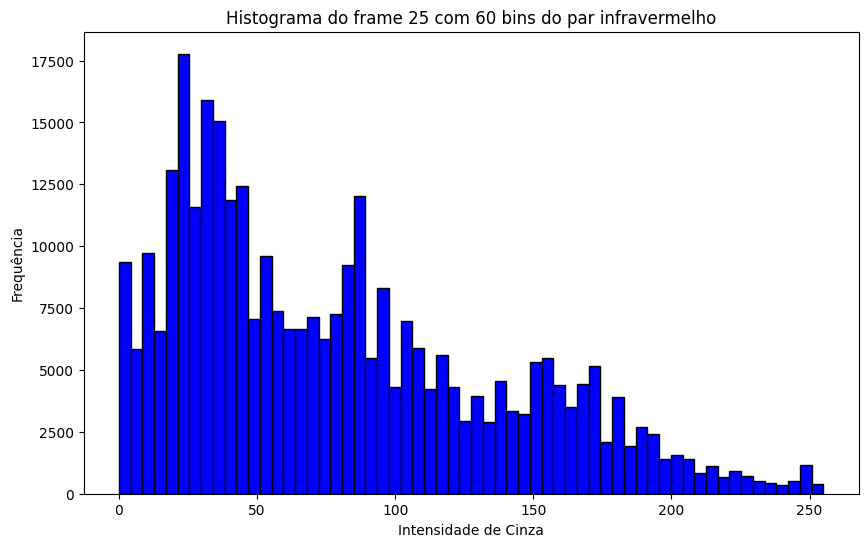

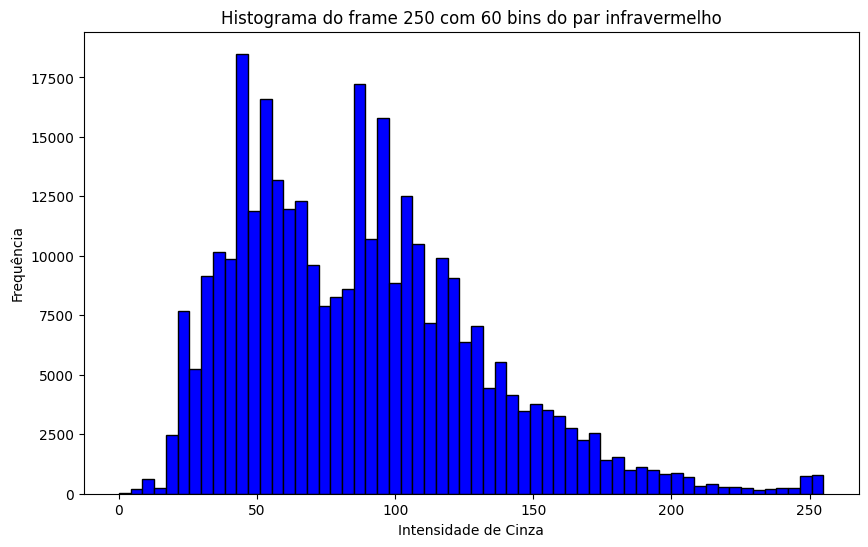

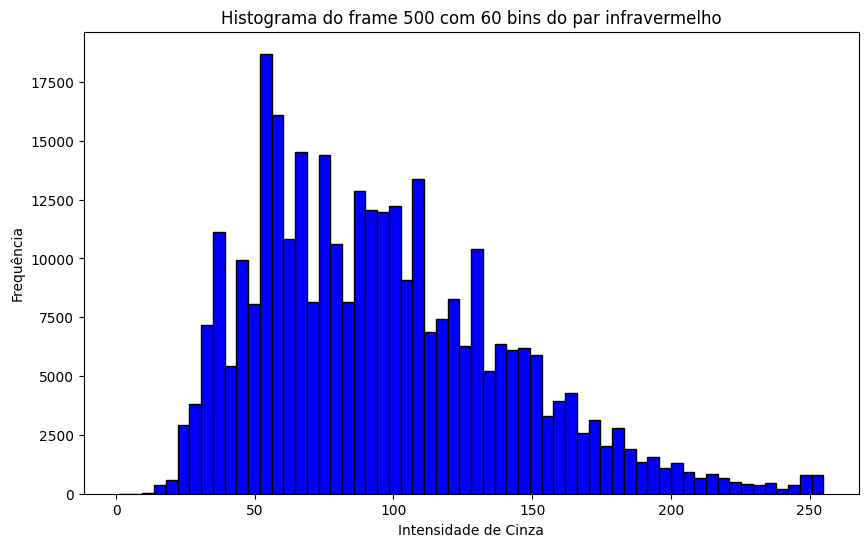

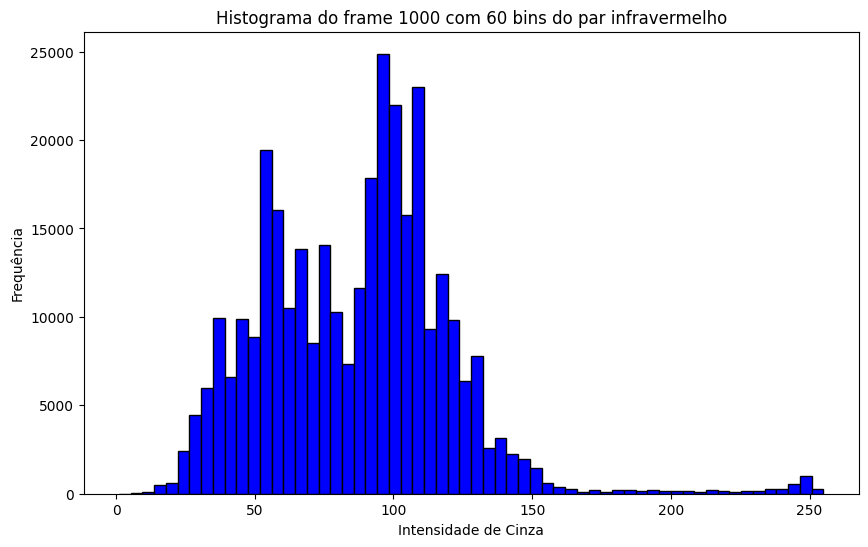

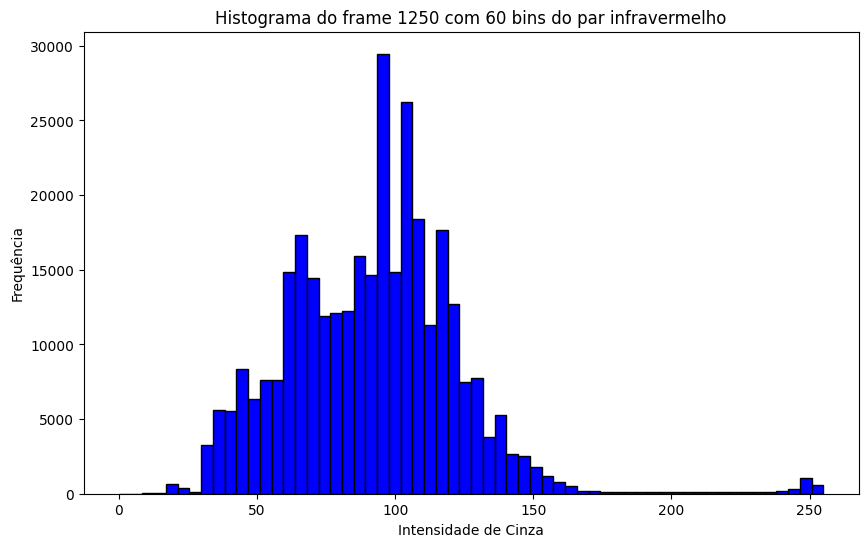

In [50]:
for chosen_frame in chosen_frames:
  data_ir_d.set(cv2.CAP_PROP_POS_MSEC, chosen_frame)

  ret, frame_t = data_ir_d.read()

  if ret:
    #converte para escala de cinza
    gray = cv2.cvtColor(frame_t, cv2.COLOR_BGR2GRAY)

    #gera o histograma
    plt.figure(figsize=(10, 6))
    plt.hist(gray.ravel(), bins=bins60, color='blue', edgecolor='black')

    plt.title('FRAME: '+ str(chosen_frame) + ' - BINS: ' + str(bins60) +' - IR - NOITE')
    plt.xlabel('Intensidade de Cinza')
    plt.ylabel('Frequência')

    plt.show()

####PAR RGB NOITE

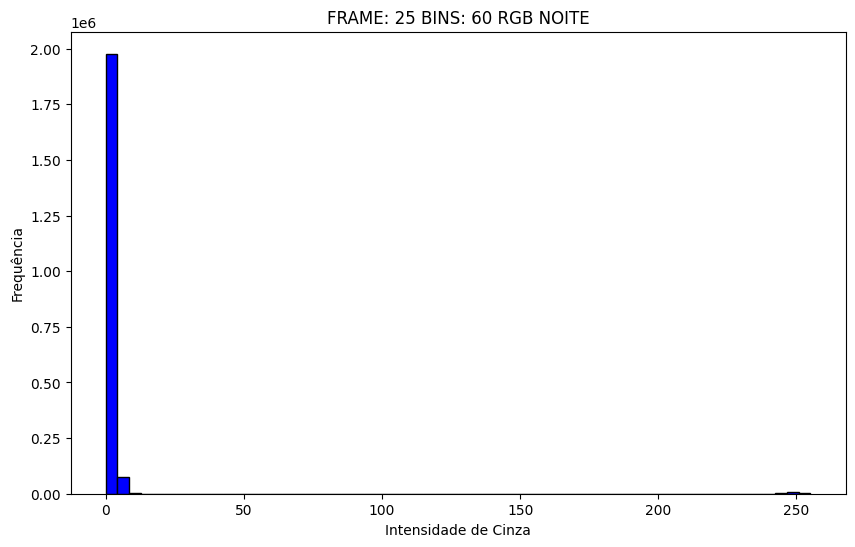

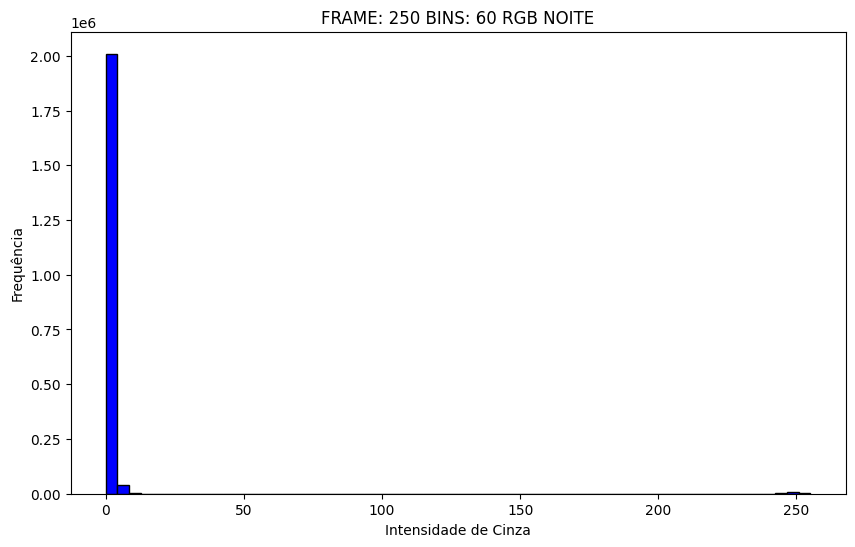

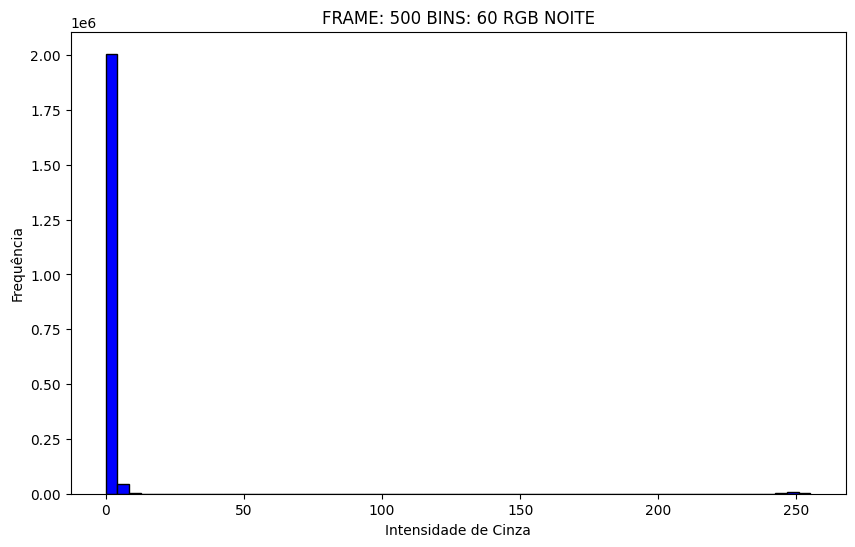

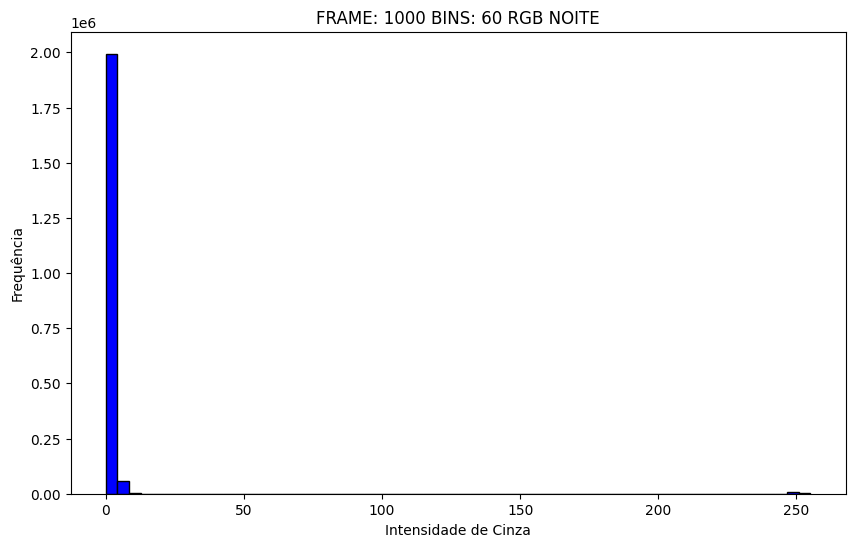

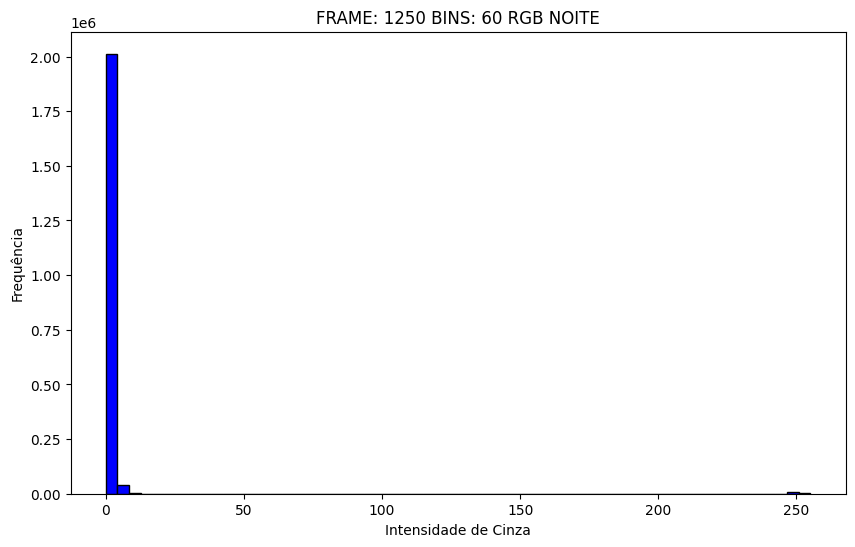

In [84]:
for chosen_frame in chosen_frames:
  data_rgb_n.set(cv2.CAP_PROP_POS_MSEC, chosen_frame)

  ret, frame_rgb = data_rgb_n.read()

  if ret:
    #converte para escala de cinza
    gray = cv2.cvtColor(frame_rgb, cv2.COLOR_BGR2GRAY)

    #gera o histograma
    plt.figure(figsize=(10, 6))
    plt.hist(gray.ravel(), bins=bins60, color='blue', edgecolor='black')

    plt.title('FRAME: '+ str(chosen_frame) + ' BINS: ' + str(bins60) +' RGB NOITE')
    plt.xlabel('Intensidade de Cinza')
    plt.ylabel('Frequência')

    plt.show()

####PAR IR NOITE

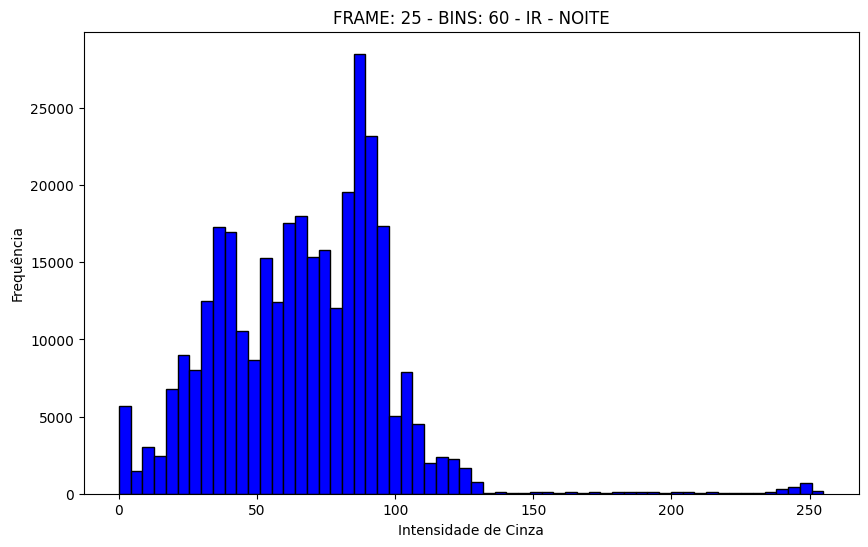

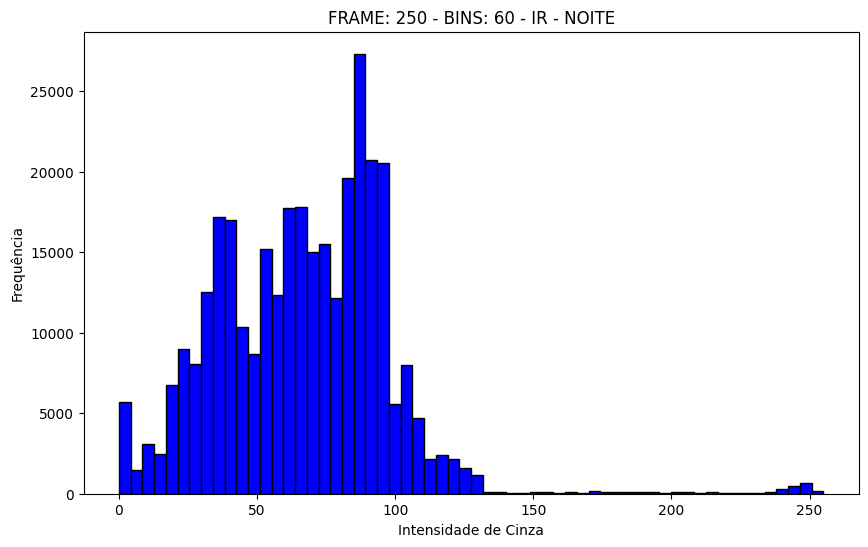

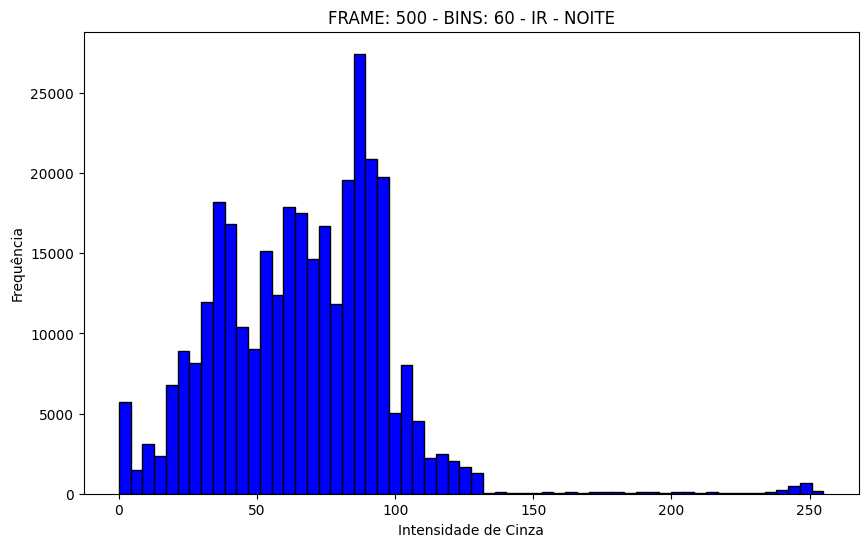

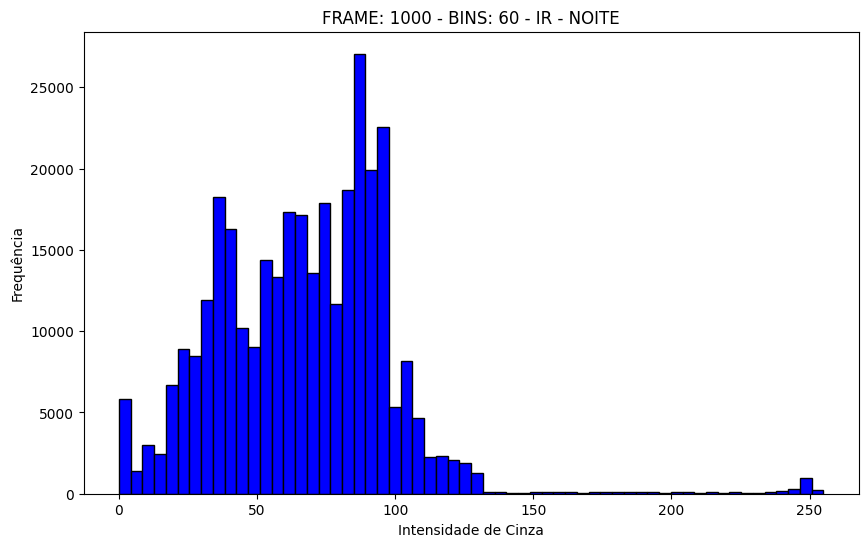

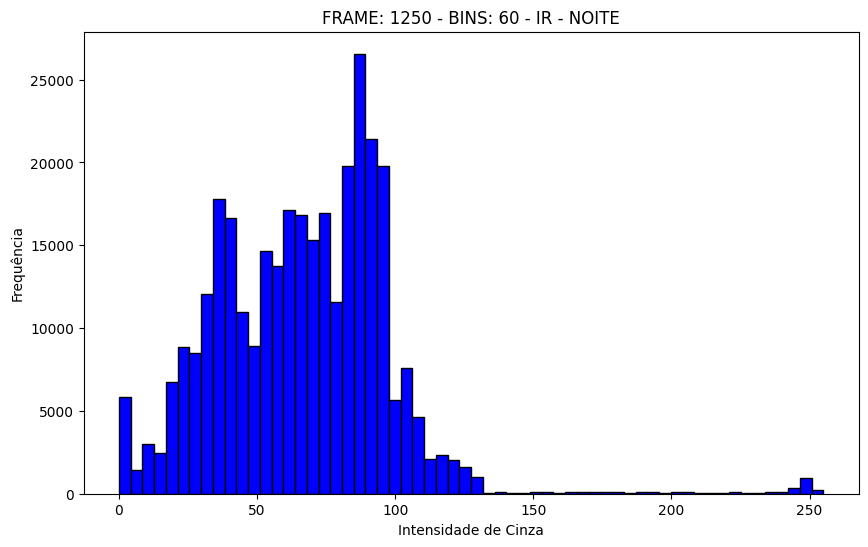

In [85]:
for chosen_frame in chosen_frames:
  data_ir_n.set(cv2.CAP_PROP_POS_MSEC, chosen_frame)

  ret, frame_t = data_ir_n.read()

  if ret:
    #converte para escala de cinza
    gray = cv2.cvtColor(frame_t, cv2.COLOR_BGR2GRAY)

    #gera o histograma
    plt.figure(figsize=(10, 6))
    plt.hist(gray.ravel(), bins=bins60, color='blue', edgecolor='black')

    plt.title('FRAME: '+ str(chosen_frame) + ' - BINS: ' + str(bins60) +' - IR - NOITE')
    plt.xlabel('Intensidade de Cinza')
    plt.ylabel('Frequência')

    plt.show()